In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor as XGBR
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH = ('/Users/inseongkim/gitfile/ML_class/proj_stud/Original_data_with_more_rows.csv')

In [3]:
data_origin = pd.read_csv(PATH)

In [4]:
data_origin.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [5]:
data_origin.isna().sum()

Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [6]:
data_origin['MeanScore'] = (data_origin['MathScore'].astype(int) + data_origin['WritingScore'].astype(int) + data_origin['ReadingScore'].astype(int))/3

In [7]:
data_origin.drop('WritingScore',axis=1,inplace=True)
data_origin.drop('MathScore',axis=1,inplace=True)
data_origin.drop('ReadingScore',axis=1,inplace=True)
data_origin['MeanScore'].astype(int)
data_origin

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MeanScore
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333
...,...,...,...,...,...,...
30636,male,group C,some high school,standard,none,51.333333
30637,male,group E,associate's degree,free/reduced,none,73.666667
30638,male,group C,some college,standard,none,30.666667
30639,male,group A,some high school,free/reduced,completed,38.666667


In [8]:
data_origin['TestPrep'].unique()

array(['none', 'completed'], dtype=object)

In [9]:
data_origin['Gender'] = data_origin['Gender'].map({'male':0,'female':1})
data_origin['EthnicGroup'] = data_origin['EthnicGroup'].map({'group A':0,
                                               'group B':1,
                                               'group C':2,
                                               'group D':3,
                                               'group E':4
                                               })
data_origin['ParentEduc'] = data_origin['ParentEduc'].map({'some high school':0,
                                              'high school':0,
                                              'some college':1,
                                              "bachelor's degree":2,
                                              "associate's degree":3,
                                              "master's degree":4
                                              })
data_origin['TestPrep'] = data_origin['TestPrep'].map({'none':0,'completed':1})
data_origin.drop('LunchType',axis=1,inplace=True)

In [10]:
std = StandardScaler()
data_origin = std.fit_transform(data_origin)
dataa = pd.DataFrame(data_origin)
data = dataa.copy()

In [11]:
kmeans = KMeans(n_clusters=5, 
random_state=0).fit(data)

/Users/inseongkim/miniconda3/envs/MLenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
kmeans.labels_

array([0, 2, 1, ..., 4, 3, 1], dtype=int32)

In [13]:
data_origin = pd.DataFrame(data_origin)

In [14]:
data_origin['Cluster'] = kmeans.labels_
data_origin


,0,1,2,3,4,Cluster
0,0.993267,-1.040275,0.503222,-0.725850,0.306026,0
1,0.993267,-0.162005,-0.241093,1.377695,0.980536,2
2,0.993267,-1.040275,1.991852,-0.725850,1.701563,1
3,-1.006779,-1.918545,1.247537,-0.725850,-1.322101,1
4,-1.006779,-0.162005,-0.241093,-0.725850,0.561874,4
...,...,...,...,...,...,...
30636,-1.006779,-0.162005,-0.985408,-0.725850,-1.182547,4
30637,-1.006779,1.594535,1.247537,-0.725850,0.375803,1
30638,-1.006779,-0.162005,-0.241093,-0.725850,-2.624602,4
30639,-1.006779,-1.918545,-0.985408,1.377695,-2.066387,3


In [15]:
kmeans.cluster_centers_

array([[ 0.99326701, -0.02549235, -0.56870933, -0.72466137, -0.19209101],
       [-0.02434621,  0.05976474,  1.31165387, -0.72585032,  0.2383788 ],
       [ 0.99326701, -0.0100814 ,  0.00654917,  1.37769452,  0.43203831],
       [-1.00677863,  0.00234413, -0.01071986,  1.37769452,  0.20383845],
       [-1.00677863, -0.02043004, -0.56864749, -0.72432975, -0.50121478]])

In [16]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

In [17]:
df_da = pd.DataFrame(pca_data)
df_da['Cluster'] = data_origin['Cluster']
df_da

,0,1,Cluster
0,0.042394,0.456213,0
1,-1.384800,1.409737,2
2,-1.483513,-0.230886,1
3,1.713849,-0.503046,1
4,0.302966,-0.706171,4
...,...,...,...
30636,1.806310,-0.361458,4
30637,-0.721030,-2.278093,1
30638,2.557043,-0.702629,4
30639,2.137465,1.580894,3


In [18]:
df_da.columns=['0','1','Cluster']

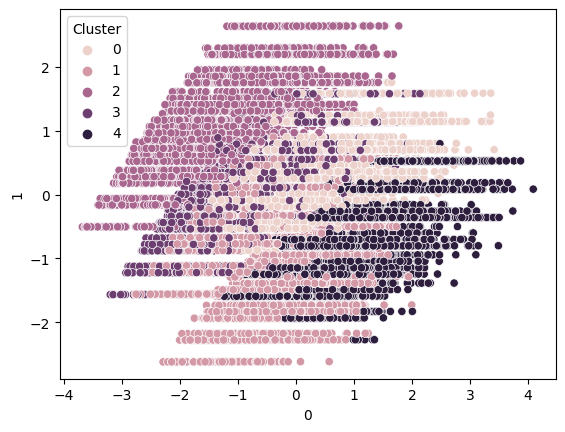

In [19]:
# axs = plt.subplot()


axs = sns.scatterplot(x='0',y='1',hue='Cluster',data=df_da)